# CÁLCULO MEDIA SEMANAL POR HORA
Para cada serie y cada día de la semana, se ha calculado la media horaria de disponibilidad de bicicletas. Estos datos, son los que se utilizarán para analizar los patrones de saturación y desabastecimiento mediante *clustering*.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datos = pd.read_parquet('../../../1-DATOS/2-DATOS PROCESADOS/BICING/INFORMACION COMPLETA/BICICLETAS_HORARIO_2022_2023_FILTRADO.parquet')

In [3]:
# Crear columnas de día de la semana y hora
datos['Día de la semana'] = datos.index.day_name()
datos['Hora'] = datos.index.hour

# Calcular la media por hora y por día de la semana, ignorando valores nulos
df_mean = datos.groupby(['Día de la semana', 'Hora']).mean(numeric_only=True)
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_mean = df_mean.reindex(dias_orden, level='Día de la semana')

df_mean.to_csv('../../../1-DATOS/3-DATOS DE RESULTADOS/medias_semanales_por_hora.csv')
df_mean.head()

station_id                 1.0        2.0       3.0       4.0       5.0    \
Día de la semana Hora                                                       
Monday           0     16.879270  11.088798  6.483356  3.805141  9.938353   
                 1     17.468453  11.302381  6.975921  4.262502  9.828083   
                 2     17.436943  11.385931  7.088644  4.381257  9.932677   
                 3     17.490165  11.502457  7.005545  4.639734  9.719204   
                 4     16.834751  11.803974  6.673918  5.892840  9.278861   

station_id                6.0       7.0       8.0       9.0       11.0   ...  \
Día de la semana Hora                                                    ...   
Monday           0     9.357690  9.235425  9.373478  8.246283  9.221410  ...   
                 1     9.263824  9.152885  9.450292  7.550910  9.081237  ...   
                 2     9.468772  8.930821  8.956402  7.542679  8.962680  ...   
                 3     9.425126  9.185303  8.969409  8.304346  8.492532  ...   
                 4     9.624486  9.282111  8.881491  9.889013  8.723596  ...   

station_id                 450.0      452.0      458.0      490.0      465.0  \
Día de la semana Hora                                                          
Monday           0     11.811153  22.279917  11.816196  21.215263  10.304893   
                 1     11.796374  22.547731  11.855045  21.810788  11.558184   
                 2     11.800219  22.588644  11.848797  22.033927  11.633632   
                 3     11.679980  22.143417  11.822892  22.430222  11.871410   
                 4     11.262965  21.145664  11.813286  23.016724  12.774638   

station_id                502.0     503.0      52.0       91.0      467.0  
Día de la semana Hora                                                      
Monday           0     8.242531  8.449146  14.291976  15.789490  6.854639  
                 1     8.510694  8.726522  14.569329  15.488231  8.428262  
                 2     8.782496  8.874901  14.638112  15.482944  9.295899  
                 3     8.838770  8.946777  14.435441  15.471475  9.310486  
                 4     8.496239  8.848010  14.129503  15.492232  8.751868  

[5 rows x 498 columns]

Como ejemplo, se muestra el patrón de la serie 1.

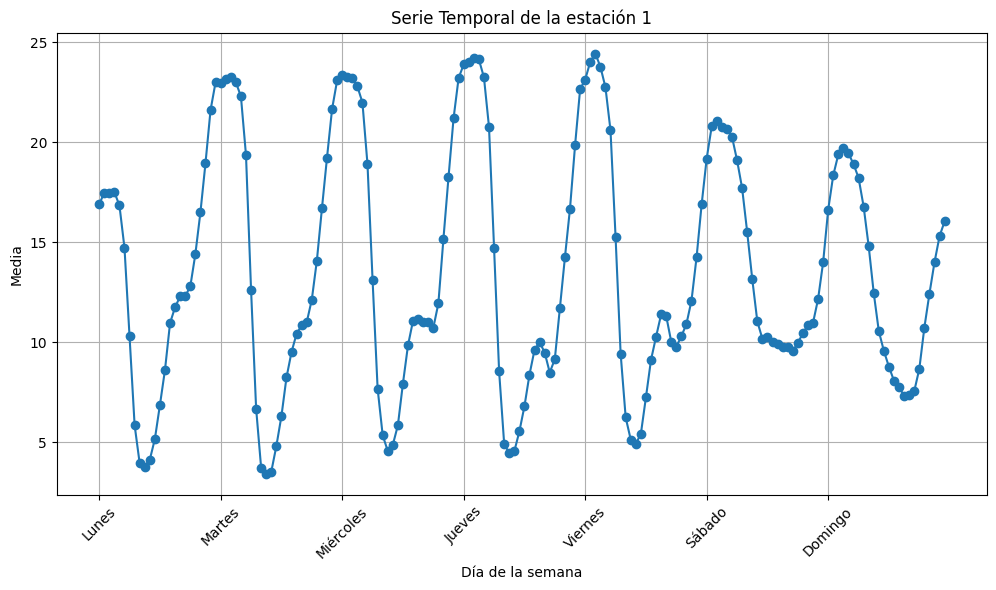

In [4]:
dias_en_espanol = {
    "Monday": "Lunes",
    "Tuesday": "Martes",
    "Wednesday": "Miércoles",
    "Thursday": "Jueves",
    "Friday": "Viernes",
    "Saturday": "Sábado",
    "Sunday": "Domingo"
}

# Seleccionar una columna cualquiera, por ejemplo la columna 'A'
columna_seleccionada = 1

# Crear el plot de la serie temporal para la columna seleccionada
plt.figure(figsize=(12, 6))
df_mean[columna_seleccionada].plot(title=f'Serie Temporal de la estación {columna_seleccionada}', marker='o')

new_labels = [label[0] for label in df_mean.index]  
new_labels_espanol = [dias_en_espanol[label] for label in new_labels]  #
tick_positions = range(0, len(new_labels_espanol), len(new_labels_espanol) // 7)  
plt.gca().set_xticks(tick_positions)
plt.gca().set_xticklabels([new_labels_espanol[pos] for pos in tick_positions], rotation=45)

plt.xlabel('Día de la semana')
plt.ylabel('Media')
plt.grid()
plt.show()